In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import os
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, precision_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

Exportamos el modelo a otro nuevo

In [ ]:
modelo_origen = load_model('/content/drive/Shareddrives/RNA Albio/Tareas/Trabajo 03/modelo.h5')
print(modelo_origen.summary())


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 510, 510, 32)      320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 255, 255, 32)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 253, 253, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 126, 126, 64)     0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1016064)           0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [ ]:
def preprocess_image(image_path):
    print("Procesando imagen:", image_path)
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
    image = np.expand_dims(image, axis=-1)
    image = image.astype('float32') / 255.0
    return image

Aqui Simulamos que la persona caslfica su closet, su ropa queda etiquetada con exito para su uso posterior


In [ ]:
IMG_SIZE = 512  # Tamaño de las imágenes de entrada del modelo
ruta_carpeta = '/content/drive/Shareddrives/RNA Albio/Tareas/Trabajo 03/Dataset/pruebas'
# Diccionario para almacenar las listas de rutas según las etiquetas de clasificación
ruta_imagenes_por_etiqueta = {}

for filename in os.listdir(ruta_carpeta):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        image_path = os.path.join(ruta_carpeta, filename)
        preprocessed_image = preprocess_image(image_path)
        prediction = modelo_origen.predict(np.array([preprocessed_image]))
        predicted_label = np.argmax(prediction)

        # Agrega la ruta a la lista correspondiente en el diccionario
        if predicted_label in ruta_imagenes_por_etiqueta:
            ruta_imagenes_por_etiqueta[predicted_label].append(image_path)
        else:
            ruta_imagenes_por_etiqueta[predicted_label] = [image_path]

# Imprime las listas de rutas para cada etiqueta de clasificación
for etiqueta, rutas in ruta_imagenes_por_etiqueta.items():
    print("Etiqueta:", etiqueta)
    for ruta in rutas:
        print("Ruta:", ruta)
    print()
# Listas para almacenar las rutas según la etiqueta
Lista_Etiqueta_0 = []
Lista_Etiqueta_1 = []
Lista_Etiqueta_2 = []
Lista_Etiqueta_3 = []
Lista_Etiqueta_4 = []
Lista_Etiqueta_5 = []

for etiqueta, rutas in ruta_imagenes_por_etiqueta.items():
    if etiqueta == 0:
        Lista_Etiqueta_0.extend(rutas)
    elif etiqueta == 1:
        Lista_Etiqueta_1.extend(rutas)
    elif etiqueta == 2:
        Lista_Etiqueta_2.extend(rutas)
    elif etiqueta == 3:
        Lista_Etiqueta_3.extend(rutas)
    elif etiqueta == 4:
        Lista_Etiqueta_4.extend(rutas)
    elif etiqueta == 5:
        Lista_Etiqueta_5.extend(rutas)

Procesando imagen: /content/drive/Shareddrives/RNA Albio/Tareas/Trabajo 03/Dataset/pruebas/Copia de f7b209c5-c0c1-4ff8-b643-0b0dbdd1d600.jpg
1/1 [==============================] - 0s 296ms/step
Procesando imagen: /content/drive/Shareddrives/RNA Albio/Tareas/Trabajo 03/Dataset/pruebas/Copia de fa5fe172-a5b0-465a-bf25-7e22e7af43cf.jpg
1/1 [==============================] - 0s 214ms/step
Procesando imagen: /content/drive/Shareddrives/RNA Albio/Tareas/Trabajo 03/Dataset/pruebas/Copia de fbdddc68-0c17-47fb-a6a4-28f9564f44fb.jpg
1/1 [==============================] - 0s 234ms/step
Procesando imagen: /content/drive/Shareddrives/RNA Albio/Tareas/Trabajo 03/Dataset/pruebas/Copia de f8a7abd7-f479-40d0-ab45-fcdaef82e1c5.jpg
1/1 [==============================] - 0s 229ms/step
Procesando imagen: /content/drive/Shareddrives/RNA Albio/Tareas/Trabajo 03/Dataset/pruebas/Copia de f56febf3-452e-4eb2-a514-4b18f950c807.jpg
1/1 [==============================] - 0s 226ms/step
Procesando imagen: /content/dr

# Finalmente aqui hacemos que en nuestra app; por ejemplo le damos a algun boton generar Outfit y dependiendo de  lo que escoja el cliente Casual o elegante le armamos su outfit.

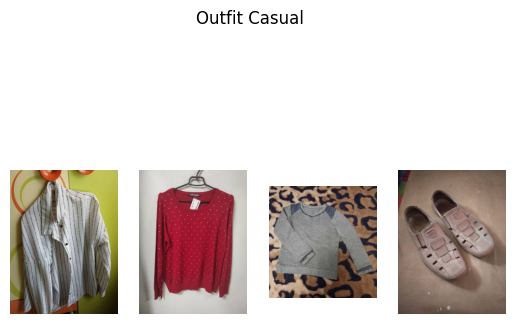

In [ ]:
selector = "Casual"  # Valor del selector: "Casual" o "Elegante"
def mostrar_plot(imagenes, titulo):
    fig, axs = plt.subplots(1, len(imagenes))
    for i, imagen in enumerate(imagenes):
        axs[i].imshow(imagen)
        axs[i].axis('off')
    plt.suptitle(titulo)
    plt.show()

if selector == "Casual":
    # Seleccionar una imagen aleatoria para cada región según la etiqueta correspondiente
    imagen_region_1 = plt.imread(random.choice(Lista_Etiqueta_0))
    imagen_region_2 = plt.imread(random.choice(Lista_Etiqueta_2))
    imagen_region_3 = plt.imread(random.choice(Lista_Etiqueta_4))
    imagen_region_4 = plt.imread(random.choice(Lista_Etiqueta_5))

    # Mostrar el plot de imágenes con título
    mostrar_plot([imagen_region_1, imagen_region_2, imagen_region_3, imagen_region_4], "Outfit Casual")

elif selector == "Elegante":
    # Seleccionar una imagen aleatoria para cada región según la etiqueta correspondiente
    imagen_region_1 = plt.imread(random.choice(Lista_Etiqueta_3))
    imagen_region_2 = plt.imread(random.choice(Lista_Etiqueta_1))

    # Mostrar el plot de imágenes con título
    mostrar_plot([imagen_region_1, imagen_region_2], "Outfit Elegante")

else:
    print("Valor del selector no válido. Debe ser 'Casual' o 'Elegante'.")